In [3]:
# Preprocessing: DICOM to PNG Conversion

# Descripción
# Este script realiza la conversión de imágenes DICOM a formatos PNG y redimensiona las imágenes a un tamaño adecuado para el modelo VGG16 (299x299 píxeles).

# Requisitos previos
# Asegúrate de tener las siguientes dependencias instaladas:
# pip install pydicom opencv-python numpy matplotlib




import os
import pydicom
import cv2
import numpy as np

# Ruta al dataset
dataset_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/original/Vindrmammo/images'
output_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/images_png'  

# Crear la estructura de directorios para las imágenes PNG
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Recorrer cada carpeta (series_id)
for series_id in os.listdir(dataset_path):
    series_path = os.path.join(dataset_path, series_id)

    # Verificar que sea un directorio
    if os.path.isdir(series_path):
        output_series_path = os.path.join(output_path, series_id)

        # Verificar y crear el directorio de salida si no existe
        if not os.path.exists(output_series_path):
            try:
                os.makedirs(output_series_path)
                print(f"Directorio creado: {output_series_path}")
            except Exception as e:
                print(f"Error al crear el directorio {output_series_path}: {e}")
                continue

        # Recorrer cada archivo en la carpeta
        for dicom_file in os.listdir(series_path):
            dicom_path = os.path.join(series_path, dicom_file)

            try:
                # Intentar leer el archivo como un archivo DICOM
                dicom = pydicom.dcmread(dicom_path)

                # Convertir la imagen DICOM a un array numpy
                image = dicom.pixel_array.astype(np.float32)
                image = (np.maximum(image, 0) / image.max()) * 255.0
                image = np.uint8(image)

                # Redimensionar la imagen a 299x299 para el modelo VGG16
                image_resized = cv2.resize(image, (299, 299))

                # Extraer el image_id sin la extensión .dicom
                image_id = os.path.splitext(dicom_file)[0]

                # Guardar la imagen como PNG usando solo el image_id
                png_filename = image_id + '.png'
                png_path = os.path.join(output_series_path, png_filename)

                # Guardar la imagen PNG
                cv2.imwrite(png_path, image_resized)
                print(f'Imagen guardada: {png_path}')
            except Exception as e:
                print(f"No se pudo procesar {dicom_file}: {e}")

print("Conversión completa. Las imágenes PNG se han guardado en", output_path)


Directorio creado: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/images_png/94b8aa8d440fd53eeaba90c90fd7c5a8
Imagen guardada: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/images_png/94b8aa8d440fd53eeaba90c90fd7c5a8/2ea60de7cfee26d3e15b44625600e02d.png
Imagen guardada: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/images_png/94b8aa8d440fd53eeaba90c90fd7c5a8/940cdbed58cbb768ac6e4b3042bdfa5e.png
Imagen guardada: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/images_png/94b8aa8d440fd53eeaba90c90fd7c5a8/7b9f21b3209f7462f0e2d0bea6f48b3a.png
Imagen guardada: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/images_png/94b8aa8d440fd53eeaba90c90fd7c5a8/94f923e59d18c6d39326ab4e7ffd5385.png
Directorio creado: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/images_png/fcc67ac333b35f981f75ac4ee37bcd23
Imagen guardada: /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Prep

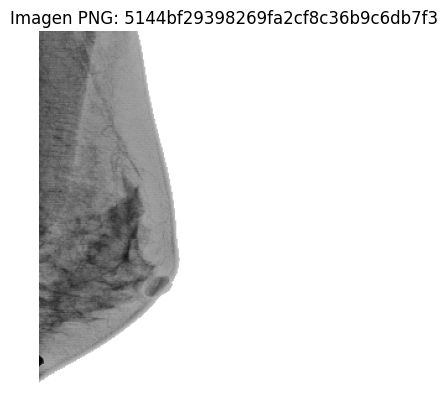

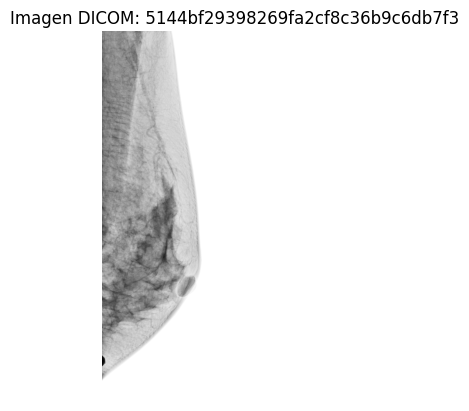

In [5]:
import os
import pydicom
import matplotlib.pyplot as plt
from pydicom.pixel_data_handlers.util import apply_voi_lut
import cv2

def visualizar_imagen(image_id, carpeta_dicom, carpeta_png, formato='png'):
    """
    Visualiza una imagen DICOM o PNG.

    Parámetros:
        - image_id: Nombre de la imagen sin extensión.
        - carpeta_dicom: Ruta a la carpeta que contiene las imágenes DICOM.
        - carpeta_png: Ruta a la carpeta que contiene las imágenes PNG.
        - formato: 'png' o 'dicom' para visualizar el archivo en el formato correspondiente.
    """
    
    if formato == 'png':
        # Ruta de la imagen PNG
        ruta_imagen = os.path.join(carpeta_png, image_id + '.png')
        if os.path.exists(ruta_imagen):
            # Cargar y mostrar la imagen PNG
            imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
            plt.imshow(imagen, cmap='gray')
            plt.title(f"Imagen PNG: {image_id}")
            plt.axis('off')
            plt.show()
        else:
            print(f"La imagen PNG {ruta_imagen} no se encontró.")
    
    elif formato == 'dicom':
        # Ruta del archivo DICOM
        ruta_dicom = os.path.join(carpeta_dicom, image_id + '.dicom')
        if os.path.exists(ruta_dicom):
            # Cargar y mostrar la imagen DICOM
            dicom = pydicom.dcmread(ruta_dicom)
            # Aplicar VOI LUT si está disponible
            imagen = apply_voi_lut(dicom.pixel_array, dicom)
            plt.imshow(imagen, cmap='gray')
            plt.title(f"Imagen DICOM: {image_id}")
            plt.axis('off')
            plt.show()
        else:
            print(f"El archivo DICOM {ruta_dicom} no se encontró.")
    else:
        print("Formato no reconocido. Usa 'png' o 'dicom'.")

# Uso de la función
# Definir las rutas de las carpetas donde están las imágenes
ruta_dicom = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/original/Vindrmammo/images/fff2339ea4b5d2f1792672ba7d52b318'
ruta_png = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/images_png/fff2339ea4b5d2f1792672ba7d52b318'

# Visualizar la imagen en formato PNG
visualizar_imagen('5144bf29398269fa2cf8c36b9c6db7f3', ruta_dicom, ruta_png, formato='png')

# Visualizar la imagen en formato DICOM
visualizar_imagen('5144bf29398269fa2cf8c36b9c6db7f3', ruta_dicom, ruta_png, formato='dicom')

